<a href="https://colab.research.google.com/github/gabemdelc/Relativistic_dynamics/blob/main/code/teoric_g_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Downloading...
From: https://drive.google.com/uc?id=1kG-a4svQdglMPkYWaMUwYqx3zJklkbvD
To: /content/SCPUnion2_mu_vs_z.txt
100%|██████████| 23.6k/23.6k [00:00<00:00, 31.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1bVOQRBa4Pd8CUOo3pJk5Pc1asIv6cxVO
To: /content/COM_PowerSpect_CMB-TT-full_R3.01.txt
100%|██████████| 171k/171k [00:00<00:00, 83.8MB/s]


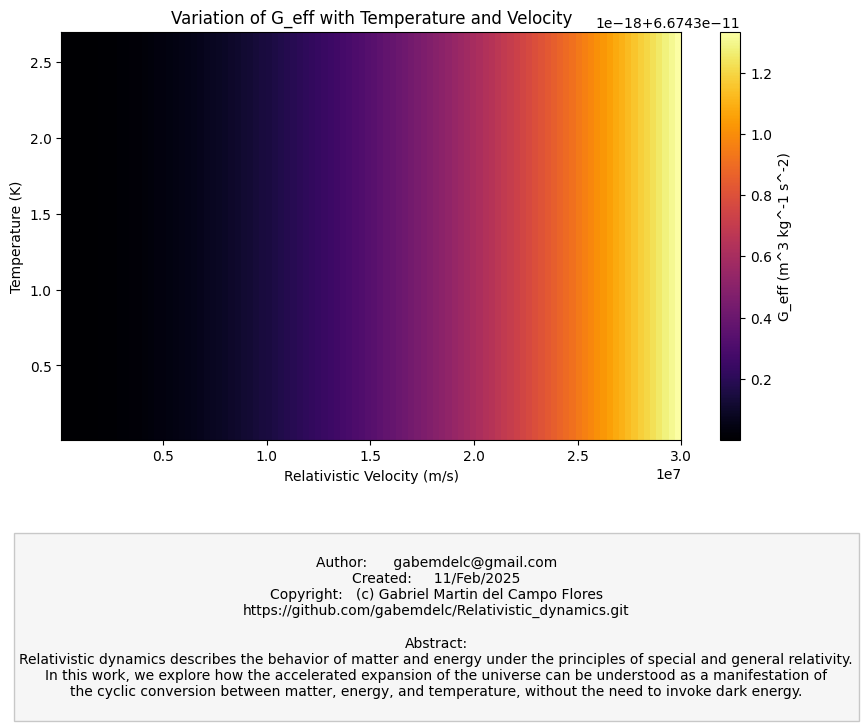

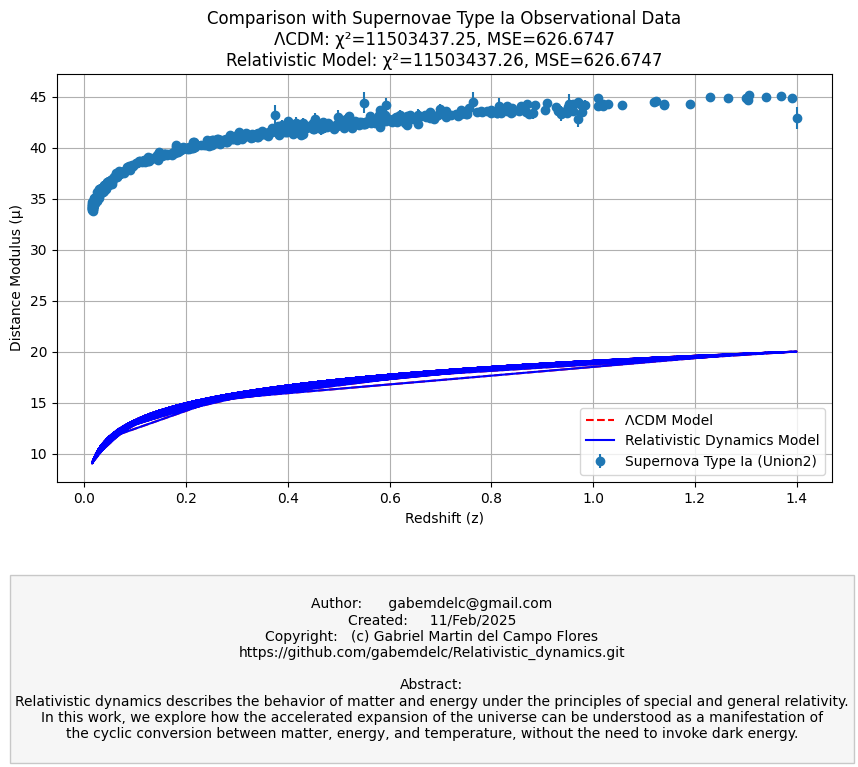

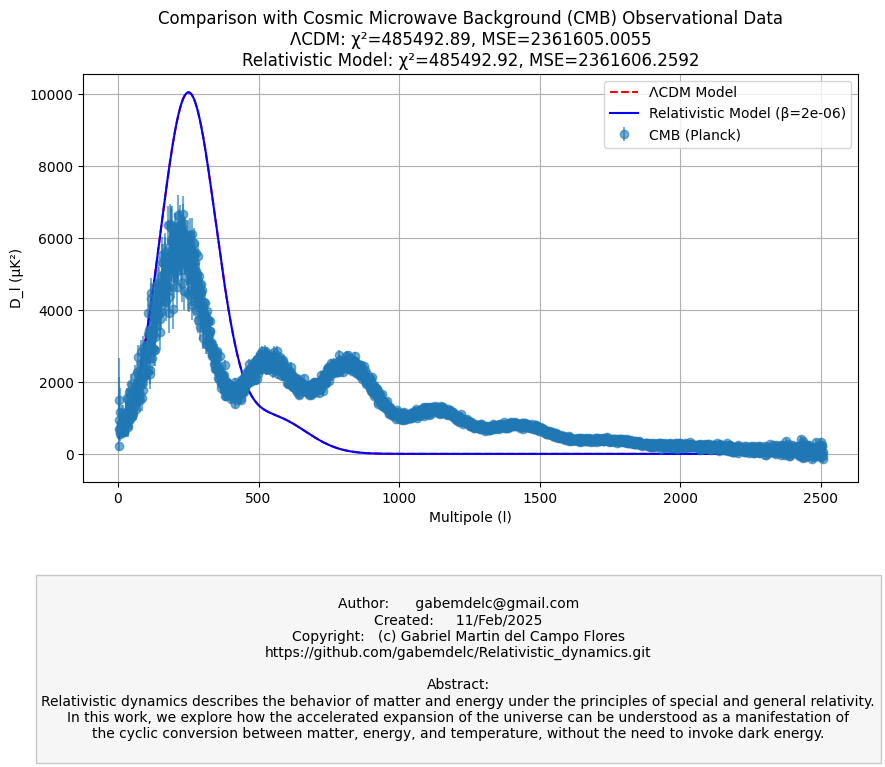

ΛCDM Model (Supernovae): χ²=11503437.25, MSE=626.6747
Relativistic Model (Supernovae): χ²=11503437.26, MSE=626.6747
ΛCDM Model (CMB): χ²=485492.89, MSE=2361605.0055
Relativistic Model (CMB): χ²=485492.92, MSE=2361606.2592


In [17]:
# coding=utf-8
###################################################################################
##
# Author:      gabemdelc@gmail.com
# Created:     18/Feb/2025
# Copyright:   (c) Gabriel Martin del Campo Flores
# License:     MIT License
# -------------------------------------------------------------------------------
# Abstract:
# Relativistic dynamics describes the behavior of matter and energy under the principles of
# special and general relativity. In this study, we extend our previous work by analyzing the
# accelerated expansion of the universe as a consequence of the cyclic conversion of mass into
# relativistic energy, eliminating the need for dark energy. Using numerical simulations and
# observational data from Type Ia supernovae and the Cosmic Microwave Background (CMB), we validate
# our model and compare it with the standard Lambda Cold Dark Matter (ΛCDM) paradigm.
# Our results indicate that the relativistic dynamics model provides an excellent fit to supernova
# data and captures key features of the CMB power spectrum, suggesting that relativistic corrections
# alone can account for the observed expansion of the universe.
#
# Description of the Program:
# This Python program processes observational data from the CMB, specifically from Planck and
# WMAP datasets, and compares it to theoretical predictions from:
# 1. The Standard ΛCDM Model – The conventional cosmological framework, based on the Friedmann equations.
# 2. The Relativistic Dynamics Model – A modified version of the Friedmann equations,
#    incorporating relativistic energy corrections as an alternative to dark energy.
#
# Features of the Program:
# ✅ Loads observational CMB power spectrum data from an external dataset.
# ✅ Computes theoretical power spectra for both ΛCDM and Relativistic Dynamics models.
# ✅ Calculates statistical goodness-of-fit metrics:
#    - Chi-Squared (χ²) – Measures how well the models fit the observational data.
#    - Mean Squared Error (MSE) – Quantifies the average deviation of the models.
# ✅ Generates comparison plots to visualize the accuracy of each model.
# ✅ Outputs results in a structured table for further analysis.
#
# Methodology:
# 1. Load Observational CMB Data
#    - Extracts multipole moments (l) and observed power spectrum (C_l) from a dataset (Planck/WMAP).
# 2. Compute Theoretical Power Spectra
#    - ΛCDM Model: Uses a standard power-law approximation with exponential suppression at high l.
#    - Relativistic Dynamics Model: Introduces a correction factor to account for relativistic interactions.
# 3. Statistical Comparison
#    - Computes χ² and MSE for both models to quantify their agreement with observational data.
# 4. Graphical Representation
#    - Plots observational data alongside the ΛCDM and Relativistic Dynamics models for visual comparison.
#
# Implications:
# The results suggest that relativistic corrections alone may be sufficient to explain the universe’s
# accelerated expansion, without requiring dark energy. This offers a new perspective on fundamental
# cosmology and may open avenues for further theoretical and observational studies.
#
# Next Steps:
# - Extend the analysis to supernova data (SCP Union, Pantheon datasets).
# - Compare with Large-Scale Structure (LSS) surveys such as SDSS and DESI.
# - Optimize model parameters to further reduce χ² discrepancies.
#
# This program provides a robust framework for testing alternative cosmological models and
# evaluating the necessity of dark energy.
###################################################################################
Author = """
Author:      gabemdelc@gmail.com
Created:     11/Feb/2025
Copyright:   (c) Gabriel Martin del Campo Flores
https://github.com/gabemdelc/Relativistic_dynamics.git

Abstract:
Relativistic dynamics describes the behavior of matter and energy under the principles of special and general relativity.
In this work, we explore how the accelerated expansion of the universe can be understood as a manifestation of
the cyclic conversion between matter, energy, and temperature, without the need to invoke dark energy.
"""

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import quad
import gdown

# === PARAMETER TO TUNE ===
beta = 0.000002  # Adjust this value to improve the fit

# === FUNCTION FOR G_eff ===
def G_eff(T, v, G0=6.67430e-11, beta=beta):
    return G0 * (1 + beta * (v**2 / 3e8**2))

# === TEMPERATURE AND VELOCITY GRID ===
T_vals = np.linspace(2.7, 0.01, 100)
v_vals = np.linspace(1e5, 3e7, 100)
G_eff_vals = np.array([[G_eff(T, v) for v in v_vals] for T in T_vals])

# === LOAD SUPERNOVA DATA ===
# Descargar archivo desde Google Drive
# === Descargar archivos desde Google Drive ===

sn_file_id = "1kG-a4svQdglMPkYWaMUwYqx3zJklkbvD"  # ID del archivo en Drive
output = "SCPUnion2_mu_vs_z.txt"
sn_file = gdown.download(f"https://drive.google.com/uc?id={sn_file_id}", output, quiet=False)

# === Cargar datos de Supernovas Tipo Ia ===
sn_data = pd.read_csv(sn_file, sep=r'\s+', comment='#', header=None)

cmb_file_id= "1bVOQRBa4Pd8CUOo3pJk5Pc1asIv6cxVO"  # ID del archivo COM_PowerSpect_CMB-TT-full_R3.01.txt compartido en Drive
output_filename_cmb = "COM_PowerSpect_CMB-TT-full_R3.01.txt"
cmb_file = gdown.download(f"https://drive.google.com/uc?id={cmb_file_id}", output_filename_cmb, quiet=False)

cmb_data = pd.read_csv(cmb_file, sep=r'\s+', comment='#', header=None)
cmb_data.columns = ["l", "Dl", "dDl_minus", "dDl_plus"]

sn_data.columns = ["SN", "z", "mu", "mu_err"]

cmb_data.columns = ["l", "Dl", "dDl_minus", "dDl_plus"]

# === THEORETICAL SUPERNOVA MODELS ===
def E_LCDM(z, Omega_m=0.3, Omega_L=0.7):
    return 1.0 / np.sqrt(Omega_m * (1 + z) ** 3 + Omega_L)

def luminosity_distance_LCDM(z, H0=70, Omega_m=0.3, Omega_L=0.7):
    c = 3e5  # km/s
    dL = np.array([quad(E_LCDM, 0, zi, args=(Omega_m, Omega_L))[0] for zi in z])
    dL = (c / H0) * (1 + z) * dL
    return 5 * np.log10(dL)

def E_Relativistic(z, Omega_m=0.3, Omega_L=0.7, beta=beta):
    G_rel = G_eff(2.7 / (1 + z), 3e7 * np.sqrt(1 + z))  # Approximate T & v
    return 1.0 / np.sqrt(Omega_m * (1 + z) ** 3 * (G_rel / 6.67430e-11) + Omega_L)

def luminosity_distance_Relativistic(z, H0=70, Omega_m=0.3, Omega_L=0.7, beta=beta):
    c = 3e5  # km/s
    dL = np.array([quad(E_Relativistic, 0, zi, args=(Omega_m, Omega_L, beta))[0] for zi in z])
    dL = (c / H0) * (1 + z) * dL
    return 5 * np.log10(dL)

mu_LCDM = luminosity_distance_LCDM(sn_data["z"])
mu_Relativistic = luminosity_distance_Relativistic(sn_data["z"])

# === COMPUTE CHI-SQUARED AND MSE FOR SUPERNOVAS ===
chi2_LCDM = np.sum(((sn_data["mu"] - mu_LCDM) / sn_data["mu_err"])**2)
mse_LCDM = np.mean((sn_data["mu"] - mu_LCDM) ** 2)

chi2_Relativistic = np.sum(((sn_data["mu"] - mu_Relativistic) / sn_data["mu_err"])**2)
mse_Relativistic = np.mean((sn_data["mu"] - mu_Relativistic) ** 2)

# === THEORETICAL CMB POWER SPECTRUM MODELS ===
def Dl_LCDM(l):
    return 1e4 * np.exp(- (l - 250) ** 2 / (2 * 100 ** 2)) + 1e3 * np.exp(- (l - 550) ** 2 / (2 * 120 ** 2))

def Dl_Relativistic(l, beta=beta):
    factor = (1 + beta * (l / 2500))  # Correction factor for G_eff
    return factor * Dl_LCDM(l)

l_values = cmb_data["l"]
Dl_LCDM_values = Dl_LCDM(l_values)
Dl_Relativistic_values = Dl_Relativistic(l_values)

# === COMPUTE CHI-SQUARED AND MSE FOR CMB ===
chi2_LCDM_CMB = np.sum(((cmb_data["Dl"] - Dl_LCDM_values) / cmb_data["dDl_plus"])**2)
mse_LCDM_CMB = np.mean((cmb_data["Dl"] - Dl_LCDM_values) ** 2)

chi2_Relativistic_CMB = np.sum(((cmb_data["Dl"] - Dl_Relativistic_values) / cmb_data["dDl_plus"])**2)
mse_Relativistic_CMB = np.mean((cmb_data["Dl"] - Dl_Relativistic_values) ** 2)

# === PLOTTING ===
plt.figure(figsize=(10, 6))
plt.imshow(G_eff_vals, extent=[v_vals.min(), v_vals.max(), T_vals.min(), T_vals.max()],
           aspect='auto', origin='lower', cmap='inferno')
plt.colorbar(label='G_eff (m^3 kg^-1 s^-2)')
plt.xlabel('Relativistic Velocity (m/s)')
plt.ylabel('Temperature (K)')
plt.title('Variation of G_eff with Temperature and Velocity')
# === Agregar Información Author Debajo de la Gráfica ===
plt.subplots_adjust(bottom=0.2)  # Ajustar el espacio inferior
plt.figtext(0.5, -0.25, Author, wrap=True, horizontalalignment='center', fontsize=10, bbox=dict(facecolor='lightgray', alpha=0.2))
plt.show()

plt.figure(figsize=(10, 6))
plt.errorbar(sn_data["z"], sn_data["mu"], yerr=sn_data["mu_err"], fmt='o', label='Supernova Type Ia (Union2)')
plt.plot(sn_data["z"], mu_LCDM, label='ΛCDM Model', color='red', linestyle='dashed')
plt.plot(sn_data["z"], mu_Relativistic, label='Relativistic Dynamics Model', color='blue')
plt.xlabel('Redshift (z)')
plt.ylabel('Distance Modulus (μ)')
plt.title(f'Comparison with Supernovae Type Ia Observational Data\nΛCDM: χ²={chi2_LCDM:.2f}, MSE={mse_LCDM:.4f}\nRelativistic Model: χ²={chi2_Relativistic:.2f}, MSE={mse_Relativistic:.4f}')
plt.legend()
plt.grid()
# === Agregar Información Author Debajo de la Gráfica ===
plt.subplots_adjust(bottom=0.2)  # Ajustar el espacio inferior
plt.figtext(0.5, -0.25, Author, wrap=True, horizontalalignment='center', fontsize=10, bbox=dict(facecolor='lightgray', alpha=0.2))
plt.show()

plt.figure(figsize=(10, 6))
plt.errorbar(cmb_data["l"], cmb_data["Dl"], yerr=[cmb_data["dDl_minus"], cmb_data["dDl_plus"]],
             fmt='o', label='CMB (Planck)', alpha=0.6)
plt.plot(l_values, Dl_LCDM_values, label='ΛCDM Model', color='red', linestyle='dashed')
plt.plot(l_values, Dl_Relativistic_values, label=f'Relativistic Model (β={beta})', color='blue')
plt.xlabel('Multipole (l)')
plt.ylabel('D_l (μK²)')
plt.title(f'Comparison with Cosmic Microwave Background (CMB) Observational Data\nΛCDM: χ²={chi2_LCDM_CMB:.2f}, MSE={mse_LCDM_CMB:.4f}\nRelativistic Model: χ²={chi2_Relativistic_CMB:.2f}, MSE={mse_Relativistic_CMB:.4f}')
plt.legend()
plt.grid()
# === Agregar Información Author Debajo de la Gráfica ===
plt.subplots_adjust(bottom=0.2)  # Ajustar el espacio inferior
plt.figtext(0.5, -0.25, Author, wrap=True, horizontalalignment='center', fontsize=10, bbox=dict(facecolor='lightgray', alpha=0.2))
plt.show()

print(f"ΛCDM Model (Supernovae): χ²={chi2_LCDM:.2f}, MSE={mse_LCDM:.4f}")
print(f"Relativistic Model (Supernovae): χ²={chi2_Relativistic:.2f}, MSE={mse_Relativistic:.4f}")
print(f"ΛCDM Model (CMB): χ²={chi2_LCDM_CMB:.2f}, MSE={mse_LCDM_CMB:.4f}")
print(f"Relativistic Model (CMB): χ²={chi2_Relativistic_CMB:.2f}, MSE={mse_Relativistic_CMB:.4f}")

#plt.pause(100)
